<a href="https://colab.research.google.com/github/daawonn/dl_project/blob/master/8_pyTorch%EA%B8%B0%EC%B4%88_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **pyTorch** (파이토치)



## 개요
- https://pytorch.org/
- python/C++/Java을 딥러닝 구현을 위한 오픈소스 라이브러리
- GPU 지원은 ndivia만 가능( CUDA만 사용가능 )
- Lua(루아,핵심사용언어), C++등으로 개발했다
- 아직까지는 텐서플로우가 더 많이 사용되나, 점차 확산을 하고 있는 추세
- Fackbook 인공지능팀 개발(= 뉴욕대 협업)
- 딥러닝 프레임워크(엔진)
- 장점
  - 복잡하고, 계산양이 큰 그래프를 쉽게 구성한다
  - 계산 그래프를 활용하면, 미분/적분도 간단하게 처리
  - GPU연산을 손쉽게 활용하여 빠른 처리가 가능

## 특징 
- numpy을 기반으로 Tensor 연산을 GPU로 수행가능
- 자동 미분 시스템을 이용하여, 모델를 손쉽게 구성
- 같이 활용되는 python 패키지
  - Scipy
  - Numpy
  - Cython:파이썬의 빠른 생산성, 외부 C라이브러리와 간결하게 연동, 실행속도를 향상 
- 학습, 추론 속도가 빠르다, 다루기도 쉽다


## pyTorch vs Tensorflow

- 2019년도 기준, 2위(pyTorch), 1위(Tensorflow)
- Tensorflow
  - Define-and-Run 방식
    - 1. 계산 그래프, 데이터 플로우 그래프를 설계
    - 2. 세션(session)에서 그래프에 들어간 데이터(수치값, 숫자)를 주입
    - 3. 세션 실행
  - 산업용
- pyTorch
  - Define-by-Run 방식  
    - 1. 계산 그래프를 그리는 동시에
    - 2. 주입할 데이터(숫자, 수치값)를 보관하고
    - 3. 연산 실행 바로 가능하다
  - 학계/연구용주로 사용, 2018년에 1.0이 런칭이 된이후, 산업용으로 넓히고 있다

In [0]:
import torch

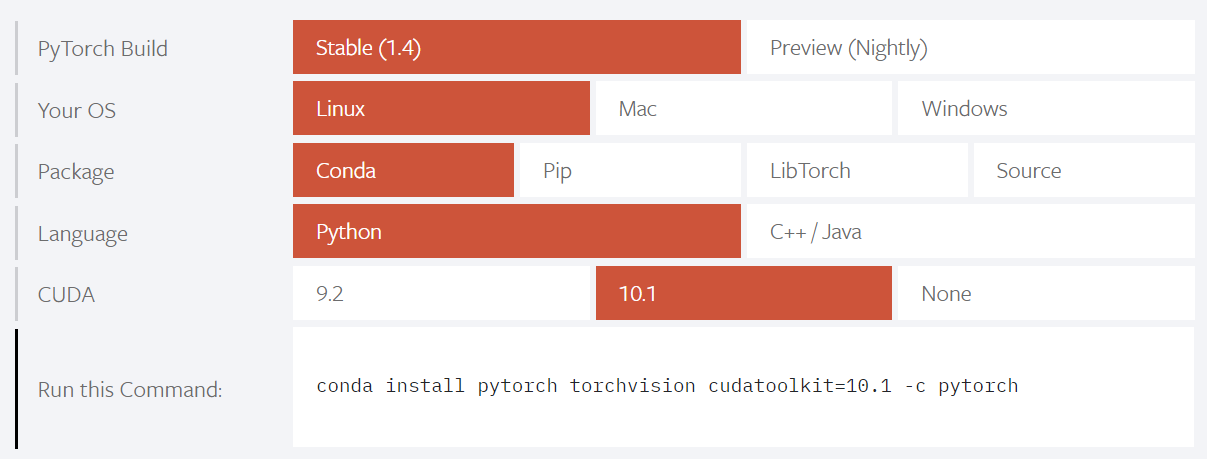

In [0]:
# 로컬 PC나 딥러닝 서버에서 사용한다면
# https://pytorch.org/ 사이트에서 본인의 환경에 맞게 시뮬레이션 하면 설치 명령이 나온다
from IPython.display import Image
Image( '/content/pyTorch_설치시뮬레이션.png', width=400)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 텐서

- 딥러닝은 텐서를 기반으로 진행되는 계산(연산)의 연속
- 딥러닝 구현상 가장 중요한 기본 단위

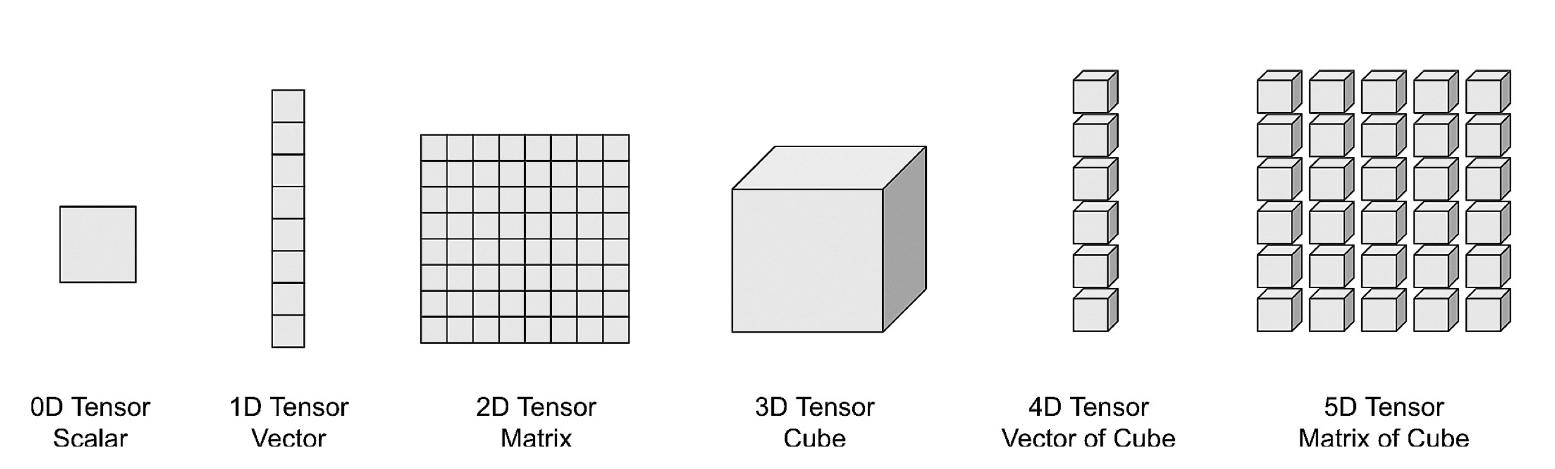

In [0]:
Image('/content/8.tensor.jpeg', width=400)

# 텐서 생성

- Tensor( 리스트 or 배열 )
  - 원소가 정수에서 float32 로 자동 변환
  - 단, 옵션에 따라서 유지될수도 있지 않을까?

In [0]:
# 리스트로부터 텐서 생성
list_src = [ [10,11,12], [20,21,22] ] # (2,3) or 2x3
# 텐서생성
x = torch.Tensor( list_src )
x
# define by run이라는 취지에서 이미 텐서에 데이터가 설정되어 있음을 알수 있다

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
# 복원 : 텐서 -> 리스트 추출 : to
# -> 타입 복구가 불가(형변환하기 전에는)
x.tolist()

[[10.0, 11.0, 12.0], [20.0, 21.0, 22.0]]

In [0]:
# numpy의 ndarray(배열)을 재료로 텐서 생성
arr = np.array( list_src )
arr

array([[10, 11, 12],
       [20, 21, 22]])

In [0]:
x = torch.Tensor( arr )
x

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
# 복원 -> 타입 복구가 불가(형변환하기 전에는)
x.numpy()

array([[10., 11., 12.],
       [20., 21., 22.]], dtype=float32)

# GPU 사용

- colab에서 수정 > 노트 속성을 gpu 사용으로 변경
  - 런타임이 다 초기화된다

## pyTorch GPU 사용

In [0]:
type(x)

torch.Tensor

In [0]:
x.device

device(type='cpu')

In [0]:
# NDIVIA
device = 'cuda'
try:
  x = x.to(device)
  print('%s 지원' % device)
except Exception as e:
  print('%s 미지원' % device, e)

cuda 지원


In [0]:
# 이 텐서는 GPU에서 연산한다 => 텐서별로 GPU, CPU를 지정할수 있다
x.device

device(type='cuda', index=0)

In [0]:
# 텐서를 cpu 연산으로 변경 처리
x = x.to('cpu')
x.device

device(type='cpu')

## Tensorflow GPU 사용

In [0]:
import tensorflow as tf
# 지원되는 하드웨어
from tensorflow.python.client import device_lib

In [0]:
# 지원하는 하드웨어 목록 중에서 
# device_type: "GPU" 찾고 
# name: "/device:GPU:0" 이 이름을 챙겨둔다
# memory_limit: 17179869184등 메모리 제한크기를 확인하여 
# 차후 학습시 batch_size에 대한 가이드를 판단한다
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2423190506702558401, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9590636432556774962
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13844050731330423684
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14224857498
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2450082684793261371
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
with tf.device('/device:CPU:0'):
  a = tf.constant( [ [1,2,3],[4,5,6]] )   # 2x3
  b = tf.constant( [ [1,2],[3,4],[5,6]] ) # 3x2
  c = tf.matmul( a, b )
  print( c )
  # 데이터 플로우 그래프 실행
  # with tf.Session() as sess:
  #   try:
  #     print( sess.run( c ) )
  #   except Exception as e:
  #     print(e)
  #     pass

Tensor("MatMul_14:0", shape=(2, 2), dtype=int32, device=/device:CPU:0)
Cannot assign a device for operation MatMul: Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='' supported_device_types_=[CPU] possible_devices_=[]
MatMul: CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  MatMul (MatMul) /device:GPU:0

Op: MatMul
Node attrs: T=DT_INT32, transpose_a=false, transpose_b=false
Registered kernels:
  device='XLA_GPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLO

In [0]:
# GPU 연산
# 통산 Session이 열리진 지점부터 사용한다
# 여기서는 간단하게 표현만 확인
with tf.device('/device:GPU:0'):
  a = tf.constant( [ [1,2,3],[4,5,6]] )   # 2x3
  b = tf.constant( [ [1,2],[3,4],[5,6]] ) # 3x2
  c = tf.matmul( a, b )
  print( c )
  # 데이터 플로우 그래프 실행
  # with tf.Session() as sess:
  #   try:
  #     print( sess.run( c ) )
  #   except Exception as e:
  #     print(e)
  #     pass

Tensor("MatMul_17:0", shape=(2, 2), dtype=int32)
Cannot assign a device for operation MatMul: Could not satisfy explicit device specification '/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='' supported_device_types_=[CPU] possible_devices_=[]
MatMul: CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  MatMul (MatMul) /device:GPU:0

Op: MatMul
Node attrs: transpose_a=false, transpose_b=false, T=DT_INT32
Registered kernels:
  device='XLA_GPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, D

In [0]:
with tf.device('/CPU:0'):
  a = tf.constant( [ [1,2,3],[4,5,6]] )   # 2x3
  b = tf.constant( [ [1,2],[3,4],[5,6]] ) # 3x2
  c = tf.matmul( a, b )
  print( c )
  # 데이터 플로우 그래프 실행

Tensor("MatMul_1:0", shape=(2, 2), dtype=int32, device=/device:CPU:0)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow is already loaded. Please restart the runtime to change versions.
Found GPU at: /device:GPU:0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

TensorFlow is already loaded. Please restart the runtime to change versions.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.18047974900036934
GPU (s):
0.18272386299986465
GPU speedup over CPU: 0x


## Keras GPU 사용